# Artificial Intelligence Project 1 - Sokoban

#### Contributor: Dumitrascu Filip-Teodor 333CA

## 1. Imports

In [1]:
import os
import time
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sokoban import Map, save_images, create_gif
from search_methods import BeamSearchSolver, LRTAStarSolver
from search_methods import heur_manhattan_distance, heur_euclidean_distance, heur_hungarian

## 2. Loading the maps

In [2]:
maps = [
	"easy_map1",
    "easy_map2",
    "medium_map1",
    "medium_map2",
    "large_map1",
    "large_map2",
    "hard_map1",
    "hard_map2",
    "super_hard_map1"
]

heuristics = [
    ("Manhattan", heur_manhattan_distance),
    ("Euclidean", heur_euclidean_distance),
    ("Hungarian", heur_hungarian),
]

results = []

## 3. Solving the maps

### LRTA* 

In [ ]:
for heuristic_name, heuristic_function in heuristics:
	for map_name in maps:
		print(f"Running LRTA* with {heuristic_name} on {map_name}")
		map_from_init = Map.from_yaml(f"tests/{map_name}.yaml")

		# Create a solver instance
		lrta_star = LRTAStarSolver(map_from_init)
		start_time_lrta = time.time()

		# Apply lrta* algorithm
		expanded_states_lrta, path_lrta_star = lrta_star.solve(heuristic_function)

		end_time_lrta = time.time()
		final_map = path_lrta_star[-1]

		# Local output
		print(f"Runtime: {end_time_lrta - start_time_lrta:.4f} seconds")
		print(f"States expanded: {expanded_states_lrta}")

		if final_map.explored_states == 1000:
			print("No solution!")
		else:
			print(f"Solution length: {len(path_lrta_star)}")
			
		# save_images(path_lrta_star, f"images/lrta_star_states/{map_name}")
		# create_gif(f"images/lrta_star_states/{map_name}", map_name + "_lrta_star.gif", "images/gifs")
		
		print(f"Pull moves: {final_map.undo_moves}")

		print("\n") # \n\n

		# Data frame values
		results.append({
        	# Quantitative
			"Algorithm": "LRTA*",
            "Map": map_name,
            "Runtime": end_time_lrta - start_time_lrta,
            "States Expanded": expanded_states_lrta,

			# Qualitative
            "Heuristic": heuristic_name,
            "Solution Length": len(path_lrta_star),
            "Pull Moves": final_map.undo_moves
        })

Running LRTA* with Manhattan on easy_map1
Runtime: 0.1275 seconds
States expanded: 5822
Solution Length: 75
Pull moves: 0


Running LRTA* with Manhattan on easy_map2
Runtime: 0.0014 seconds
States expanded: 56
Solution Length: 19
Pull moves: 0


Running LRTA* with Manhattan on medium_map1
Runtime: 0.0085 seconds
States expanded: 332
Solution Length: 101
Pull moves: 0


Running LRTA* with Manhattan on medium_map2
Runtime: 7.8852 seconds
States expanded: 274545
Solution Length: 68
Pull moves: 0


Running LRTA* with Manhattan on large_map1
Runtime: 1.0783 seconds
States expanded: 33107
Solution Length: 355
Pull moves: 0


Running LRTA* with Manhattan on large_map2
Runtime: 15.0002 seconds
States expanded: 400664
Solution Length: 568
Pull moves: 0


Running LRTA* with Manhattan on hard_map1
Runtime: 11.0298 seconds
States expanded: 317359
Solution Length: 98
Pull moves: 0


Running LRTA* with Manhattan on hard_map2
Runtime: 0.3421 seconds
States expanded: 12108
Solution Length: 118
Pull mo

### Beam Search

In [ ]:
for heuristic_name, heuristic_function in heuristics:
	for map_name in maps:
		print(f"Running Beam Search with {heuristic_name} on {map_name}")
		map_from_init = Map.from_yaml(f"tests/{map_name}.yaml")

		# Create a solver instance
		beam_search = BeamSearchSolver(map_from_init)
		start_time_beam = time.time()

		# Apply beam search algorithm
		expanded_states_beam, path_beam_search = beam_search.solve(heuristic_function)

		end_time_beam = time.time()
		final_map = path_beam_search[-1]

		# Local output
		print(f"Runtime: {end_time_beam - start_time_beam:.4f} seconds")
		print(f"States expanded: {expanded_states_beam}")

		if final_map.explored_states == 1000:
			print("No solution!")
		else:
			print(f"Solution Length: {len(path_beam_search)}")

		print(f"Pull moves: {final_map.undo_moves}")

		save_images(path_beam_search, f"images/beam_search_states/{map_name}")
		create_gif(f"images/beam_search_states/{map_name}", map_name + "_beam_search.gif", "images/gifs")

		print("\n") # \n\n

		# Data frame values
		results.append({
        	# Quantitative
			"Algorithm": "Beam Search",
            "Map": map_name,
            "Runtime": end_time_beam - start_time_beam,
            "States Expanded": expanded_states_beam,

			# Qualitative
            "Heuristic": heuristic_name,
            "Solution Length": len(path_beam_search),
            "Pull Moves": final_map.undo_moves
        })

Running Beam Search with Manhattan on easy_map1
Runtime: 0.0338 seconds
States expanded: 1094
Solution Length: 20
Pull moves: 0


Running Beam Search with Manhattan on easy_map2
Runtime: 0.0112 seconds
States expanded: 552
Solution Length: 10
Pull moves: 0


Running Beam Search with Manhattan on medium_map1
Runtime: 0.3746 seconds
States expanded: 14801
Solution Length: 22
Pull moves: 0


Running Beam Search with Manhattan on medium_map2
Runtime: 0.6895 seconds
States expanded: 25345
Solution Length: 33
Pull moves: 0


Running Beam Search with Manhattan on large_map1
Runtime: 0.4627 seconds
States expanded: 17079
Solution Length: 30
Pull moves: 0


Running Beam Search with Manhattan on large_map2
Runtime: 1.6682 seconds
States expanded: 52575
Solution Length: 48
Pull moves: 0


Running Beam Search with Manhattan on hard_map1
Runtime: 0.6420 seconds
States expanded: 22966
Solution Length: 32
Pull moves: 0


Running Beam Search with Manhattan on hard_map2
Runtime: 7.0120 seconds
States e

## 4. Compare


--- Final Results ---


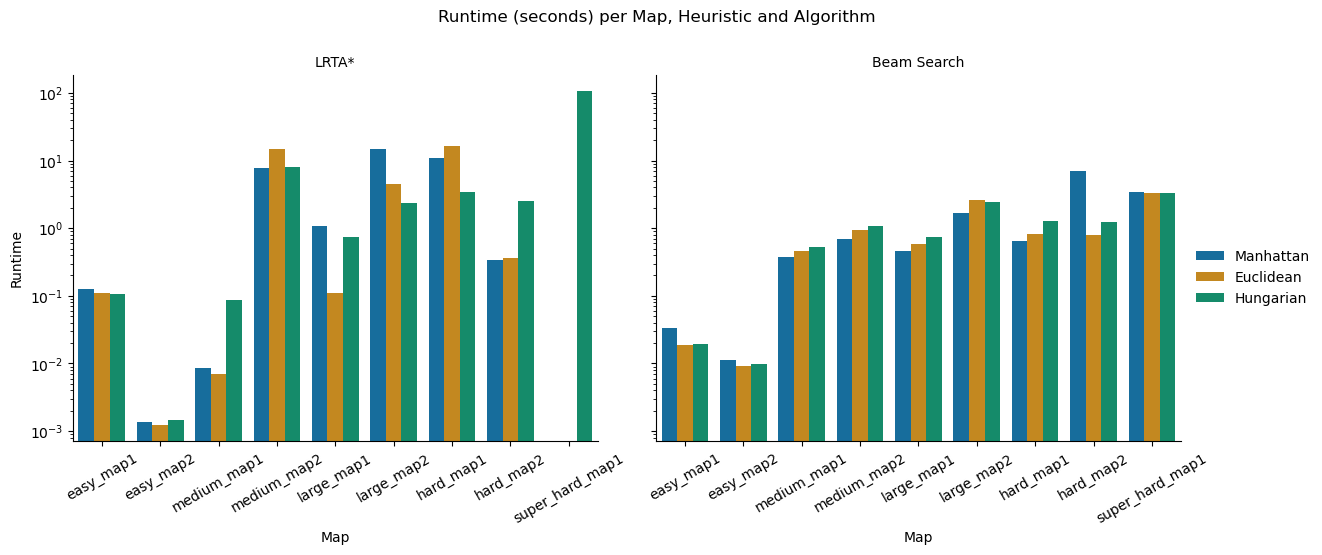

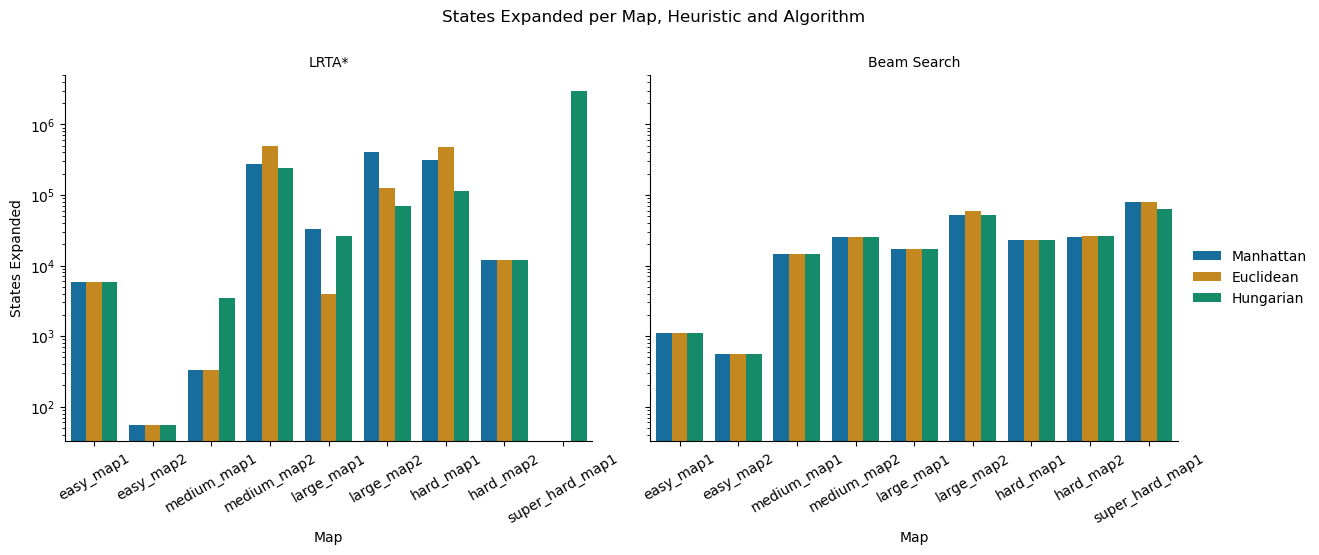

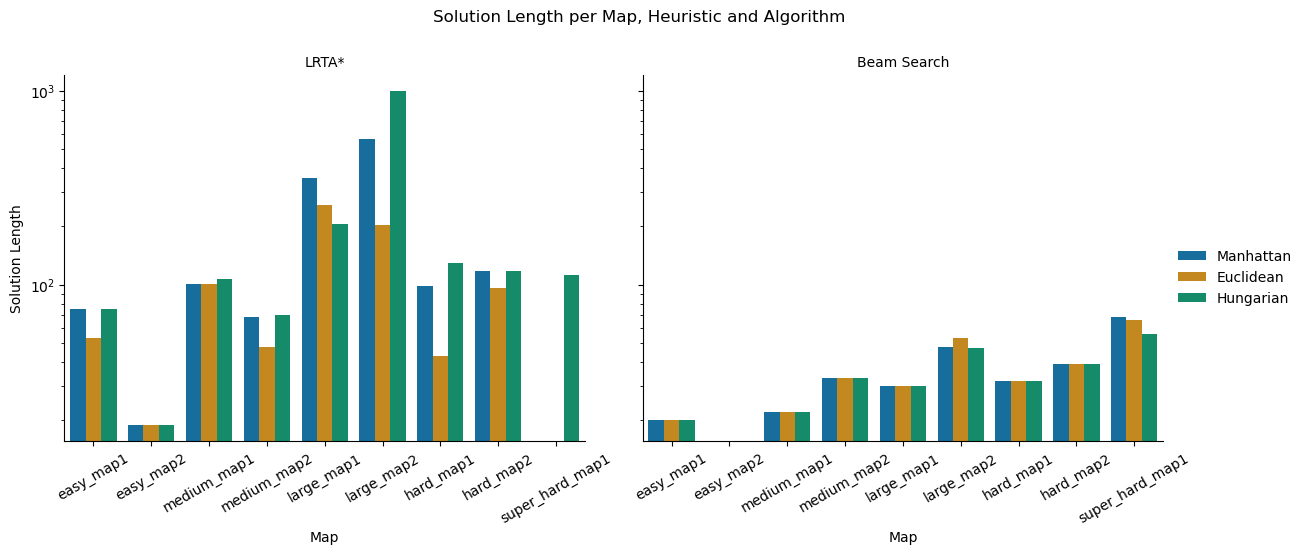

In [9]:
print("\n--- Final Results ---")

results_df = pd.DataFrame(results)
filtered_df = results_df[results_df["Solution Length"] < 1000]

os.makedirs("images/plots", exist_ok=True)

metrics = [
    ("Runtime", "Runtime (seconds) per Map, Heuristic and Algorithm"),
    ("States Expanded", "States Expanded per Map, Heuristic and Algorithm"),
    ("Solution Length", "Solution Length per Map, Heuristic and Algorithm"),
]

for metric, title in metrics:
    g = sns.FacetGrid(filtered_df, col="Algorithm", height=5, aspect=1.2)
    g.map_dataframe(
        sns.barplot,
        x="Map",
        y=metric,
        hue="Heuristic",
        errorbar=None,
        palette="colorblind"
    )
    g.set_titles(col_template="{col_name}")
    g.set_xticklabels(rotation=30)
    g.add_legend()
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(title)

    for ax in g.axes.flat:
        ydata = [bar.get_height() for bar in ax.patches]
        if all(val >= 0 for val in ydata):
            ax.set_yscale('log')
			#ax.set_yscale('symlog', linthresh=10)


    filename = metric.lower().replace(' ', '_') + ".png"
    g.savefig(f"images/plots/{filename}")\

    plt.show()



## 5. Cleanup

In [ ]:
# def clean_dir(root_dir):
#     for name in os.listdir(root_dir):
#         full_path = os.path.join(root_dir, name)
#         if os.path.isfile(full_path) or os.path.islink(full_path):
#             os.remove(full_path)
#         elif os.path.isdir(full_path):
#             shutil.rmtree(full_path)
            
# clean_dir("images")